# importing libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# loading Model

In [3]:
cnn = tf.keras.models.load_model("/content/trained_model.h5")

# visualization and performing prediction on single image


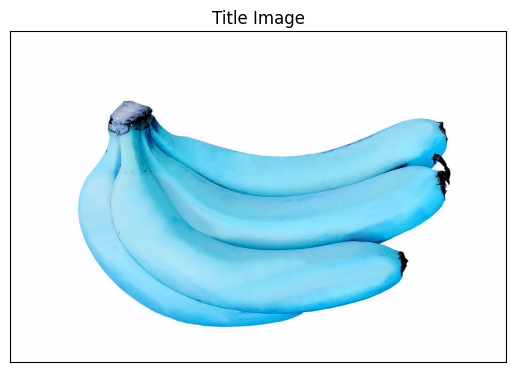

In [13]:
import cv2
image_path= "/content/drive/MyDrive/Fruits_Vegetables_recognition/test/banana/Image_1.jpg"
img= cv2.imread(image_path)
plt.imshow(img)
plt.title("Title Image")
plt.xticks([])
plt.yticks([])
plt.show()

# Test Model


In [14]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr= tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr]) # converting single image to batch
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 17ms/step


In [15]:
print(predictions)

[[2.4515882e-15 9.9999988e-01 1.2503588e-15 1.3907770e-11 1.8863307e-12
  4.0551458e-14 8.4567451e-14 9.3728332e-08 2.0758326e-14 1.7927796e-14
  7.8162893e-14 2.5647352e-17 2.5093494e-10 2.6058762e-12 2.4013271e-09
  1.4061555e-13 4.2744763e-11 1.0519623e-11 3.2969124e-13 4.9956150e-11
  1.7634044e-13 6.4116873e-10 2.0480883e-16 2.5953828e-10 7.4881502e-13
  2.5074849e-09 3.1780699e-20 8.3269190e-11 3.8792164e-14 1.4556103e-11
  1.8958676e-12 4.2878635e-13 7.9597972e-19 2.4162303e-17 2.9048114e-14
  1.0156091e-13]]


In [8]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Vegetables_recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 359 files belonging to 36 classes.


In [16]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [17]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index[0][0])

1


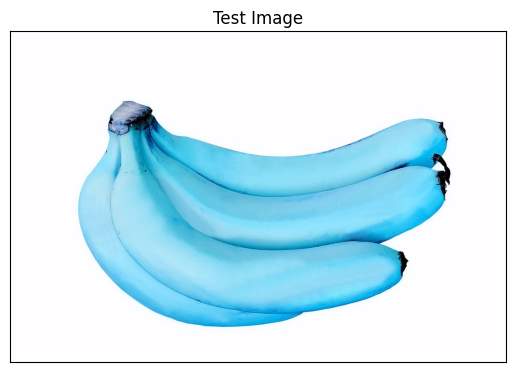

In [18]:
# display image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [19]:
# single predictions
print("it is a {}".format(test_set.class_names[result_index[0][0]]))

it is a banana
